In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

C:\Users\-pj\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv("[Dataset]_Module11_Train_(Employee).csv")
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [4]:
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [5]:
data.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [6]:
data.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [7]:
#data["Age"]=data["Age"].fillna(data["Age"].mean())

In [8]:
data.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [9]:
data.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [10]:
#data["Time_of_service"]=data["Time_of_service"].fillna(data["Time_of_service"].mean())

In [11]:
#data.isna().sum()

In [12]:
#data["Work_Life_balance"]=data["Work_Life_balance"].fillna(data["Work_Life_balance"].mean())

In [13]:
#data.isna().sum()

In [14]:
missing_value=["Age","Time_of_service","Work_Life_balance","VAR2","VAR4"]

In [15]:
for col in missing_value:
    data[col]=data[col].fillna(data[col].mean())

In [16]:
data.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    9
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [17]:
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [18]:
new_data=data.select_dtypes(["int","float"])

In [19]:
new_data.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Age,1.000000,-0.005599,0.883423,0.141393,0.001230,0.011897,0.002367,0.012584,0.002985,0.005534,0.005023,0.007356,0.001664,0.000014,-0.000809,0.008476,-0.015086
Education_Level,-0.005599,1.000000,-0.012657,-0.002077,0.002991,-0.017690,0.009986,0.006834,-0.015241,-0.002185,-0.009894,-0.009689,0.004283,0.005444,0.009195,0.012909,-0.008143
Time_of_service,0.883423,-0.012657,1.000000,0.135671,-0.003452,0.004791,-0.002261,0.020092,-0.002527,0.004715,0.003659,0.006804,-0.005679,0.003158,0.007542,0.006972,-0.016213
Time_since_promotion,0.141393,-0.002077,0.135671,1.000000,0.014147,-0.012061,-0.008851,-0.008901,-0.007418,-0.002873,0.004022,-0.002783,-0.003549,0.000563,0.017264,0.005173,0.013880
growth_rate,0.001230,0.002991,-0.003452,0.014147,1.000000,0.008460,-0.006887,-0.004145,-0.018306,0.001351,0.010437,0.010991,0.020272,-0.015122,-0.005860,-0.017993,0.014247
Travel_Rate,0.011897,-0.017690,0.004791,-0.012061,0.008460,1.000000,0.021299,-0.011689,0.004129,0.023898,0.008002,-0.009019,-0.005639,-0.003866,-0.012280,-0.006271,-0.012608
Post_Level,0.002367,0.009986,-0.002261,-0.008851,-0.006887,0.021299,1.000000,0.022389,-0.014460,-0.008458,-0.006750,0.010387,-0.012172,0.013008,0.002765,-0.003397,0.016402
Pay_Scale,0.012584,0.006834,0.020092,-0.008901,-0.004145,-0.011689,0.022389,1.000000,-0.022714,0.011354,0.006038,0.003380,-0.009750,0.018080,-0.012318,0.002381,-0.015236
Work_Life_balance,0.002985,-0.015241,-0.002527,-0.007418,-0.018306,0.004129,-0.014460,-0.022714,1.000000,-0.022025,-0.001423,0.004473,-0.025473,0.022178,0.003869,0.024506,0.020738
VAR1,0.005534,-0.002185,0.004715,-0.002873,0.001351,0.023898,-0.008458,0.011354,-0.022025,1.000000,0.002181,-0.003318,0.002009,0.007904,-0.002771,0.009355,-0.008073


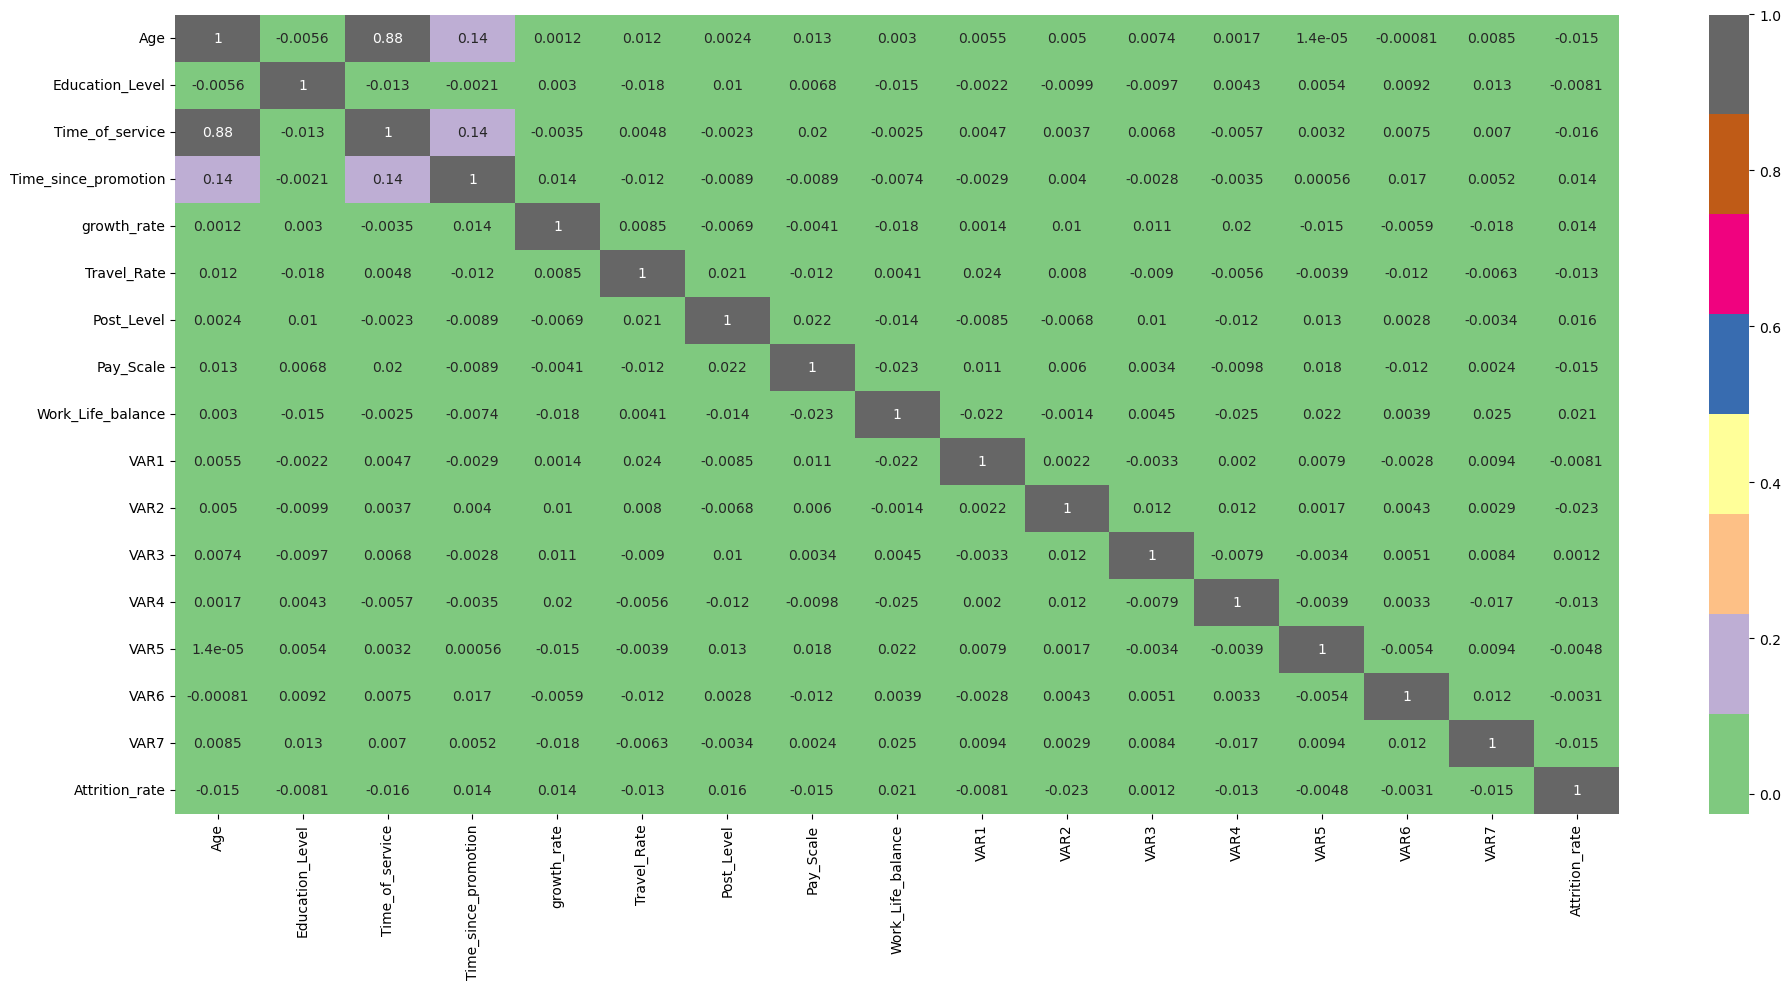

<Figure size 640x480 with 0 Axes>

In [20]:
cor=new_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
plt.tight_layout()         
plt.show()
plt.savefig("main_correlation.png")

In [21]:
x= data[['VAR7','VAR6','VAR5','VAR1','VAR3','growth_rate','Time_of_service','Time_since_promotion','Travel_Rate','Post_Level',
       'Education_Level']]

In [22]:
y=data[["Attrition_rate"]]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,shuffle=True)
print(f"x train {x_train.shape}")
print(f"Y train {y_train.shape}")
print(f"X test {x_test.shape}")
print(f"y test {y_test.shape}")

x train (4900, 11)
Y train (4900, 1)
X test (2100, 11)
y test (2100, 1)


In [25]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.predict(x_test)

array([[0.18378292],
       [0.18256544],
       [0.1876086 ],
       ...,
       [0.18997422],
       [0.19101843],
       [0.19289887]])

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [27]:
select_model=[LinearRegression(),DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5),
             RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)]

In [28]:
my_rmse=[]
my_r_square=[]
for model in select_model:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=sqrt(mean_squared_error(y_pred,y_test))
    my_rmse.append(rmse)
    r_sq=r2_score(y_pred,y_test)
    my_r_square.append(r_sq)
    print(f"RMSE value{my_rmse}and R squared value{my_r_square}of model{model}") 

RMSE value[0.1760916148691475]and R squared value[-761.7646414289486]of modelLinearRegression()
RMSE value[0.1760916148691475, 0.23868594653701858]and R squared value[-761.7646414289486, -1.1783373321840616]of modelDecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
RMSE value[0.1760916148691475, 0.23868594653701858, 0.18164260771916968]and R squared value[-761.7646414289486, -1.1783373321840616, -16.99745448404138]of modelRandomForestRegressor(min_samples_leaf=2, min_samples_split=5)


In [29]:
result=[my_rmse,my_r_square]
result

[[0.1760916148691475, 0.23868594653701858, 0.18164260771916968],
 [-761.7646414289486, -1.1783373321840616, -16.99745448404138]]

In [30]:
pd.DataFrame(data=result,columns=(["LR","DIR","RFR"]),index=["rmse","my_r_square"])

,LR,DIR,RFR
rmse,0.176092,0.238686,0.181643
my_r_square,-761.764641,-1.178337,-16.997454


In [31]:
rf=RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)

In [32]:
rf.fit(x_train,y_train)
rf.predict(x_test)

array([0.18748921, 0.2049394 , 0.41315379, ..., 0.19476152, 0.17251727,
       0.14382198])

In [34]:
import pickle
pickle.dump(rf,open("case_study_emp.pkl","wb"))